<a href="https://colab.research.google.com/github/agent515/chatbot_Cornell_Dialogue_Dataset/blob/master/chatbot_cornellDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

In [3]:
dialogues = {}

lines = open('/content/gdrive/My Drive/ML Notebooks/data/cornell_dialogue_dataset/movie_lines.txt', encoding='utf-8',errors='ignore').read().split('\n')
for line in lines:
  temp_line = line.split(' +++$+++ ')
  dialogues[temp_line[0]] = temp_line[-1]
print(len(dialogues))

dialogues['L194']

304714


'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.'

In [4]:
conversations = []

converses = open('/content/gdrive/My Drive/ML Notebooks/data/cornell_dialogue_dataset/movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')
for converse in converses:
  temp_line = converse.split(' +++$+++ ')
  conversations.append(temp_line[-1][1:-1].replace("'", " ").replace(",","").split())
print(len(conversations))
conversations[0]

83098


['L194', 'L195', 'L196', 'L197']

In [5]:
import re
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"'bout", "about", txt)
    txt = re.sub(r" ----", ".", txt)
    txt = re.sub(r" ---", ".", txt)
    txt = re.sub(r" --", ".", txt)
    # txt = re.sub(r"...", ".", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    # txt = re.sub(r"[^\w\s]", "", txt)
    return txt

In [6]:
# Accept questions and answers with maxlen of 100 chars
maxlen = 25

questions = []
answers = []

for i in range(len(conversations)):
  for j in range(len(conversations[i])-1):
    if len(dialogues[conversations[i][j]]) > maxlen or len(dialogues[conversations[i][j+1]]) > maxlen:
      continue
    questions.append(clean_text(dialogues[conversations[i][j]]))
    answers.append(clean_text(dialogues[conversations[i][j+1]]))

print(len(questions), len(answers))
print(questions[:5])
print(answers[:5])

32042 32042
['there.', 'have fun tonight?', 'what good stuff?', 'wow', 'she okay?']
['where?', 'tons', 'the "real you".', "let's go.", 'i hope so.']


# Creating a Vocabulary

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
count = {}

for i in range(len(questions)):
  words = nltk.word_tokenize(questions[i])
  for word in words:
    if word not in count:
      count[word] = 1
    else:
      count[word] += 1

for i in range(len(answers)):
  words = nltk.word_tokenize(answers[i])
  for word in words:
    if word not in count:
      count[word] = 1
    else:
      count[word] += 1

In [9]:
vocab = set()
thres = 5

for k, v in count.items():
  if v < 5: continue
  vocab.add(k)

# words = nltk.word_tokenize(answers[-1])
# vocab.update(set(words))

print(len(vocab))
print(vocab)

2329
{'believe', 'hmmm', 'seat', 'you-', 'kirsty', 'kathy', 'share', 'television', 'wearing', 'temper', 'possible', 'shoe', 'report', 'wheel', 'lookin', 'pull', 'lot', 'airport', 'suicide', 'weekend', 'calls', 'soda', 'sun', 'president', 'men', 'town', 'blind', 'rough', 'kat', 'boy', '2', 'tits', 'yesterday', 'promised', 'boring', 'quite', 'jimmy', 'certain', 'down', 'hurting', 'elaine', 'chair', 'started', 'blank', 'someday', 'miles', 'test', 'ni', 'five', 'opera', 'ahh', 'aye', 'sport', 'yourself', 'closet', 'doing', 'tons', 'go', 'doc', 'higher', 'wayne', 'point', 'type', 'half', 'tradition', 'shooting', 'upstairs', 'book', 'soho', 'est', 'lips', 'hi', 'shoes', 'steve', 'careful', 'admiral', 'bridge', 'china', 'did', 'shot', 'stay', 'vietnam', 'story', 'scar', 'prom', 'hiya', 'exactly', 'baker', 'crash', 'perhaps', 'mmmm', 'suzette', 'bill', 'boots', 'hmmmm', 'safety', 'people', 'gave', 'has', 'shoot', 'tricked', 'kit', 'bless', 'nam', 'break', 'cuz', 'met', 'risk', 'state', 'neithe

In [10]:
vocab_len = len(vocab) + 1

# Padding & Vectorization

In [11]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer(filters=[])

In [13]:
tokenizer.fit_on_texts(vocab)

In [14]:
tokenizer.word_index['OUT'] = vocab_len
tokenizer.word_index['SOS'] = vocab_len + 1
tokenizer.word_index['EOS'] = vocab_len + 2

tokenizer.index_word[vocab_len] = 'OUT'
tokenizer.index_word[vocab_len + 1] = 'SOS'
tokenizer.index_word[vocab_len + 2] = 'EOS'

vocab_len += 3

In [15]:
tokenizer.word_index

{'believe': 1,
 'hmmm': 2,
 'seat': 3,
 'you-': 4,
 'kirsty': 5,
 'kathy': 6,
 'share': 7,
 'television': 8,
 'wearing': 9,
 'temper': 10,
 'possible': 11,
 'shoe': 12,
 'report': 13,
 'wheel': 14,
 'lookin': 15,
 'pull': 16,
 'lot': 17,
 'airport': 18,
 'suicide': 19,
 'weekend': 20,
 'calls': 21,
 'soda': 22,
 'sun': 23,
 'president': 24,
 'men': 25,
 'town': 26,
 'blind': 27,
 'rough': 28,
 'kat': 29,
 'boy': 30,
 '2': 31,
 'tits': 32,
 'yesterday': 33,
 'promised': 34,
 'boring': 35,
 'quite': 36,
 'jimmy': 37,
 'certain': 38,
 'down': 39,
 'hurting': 40,
 'elaine': 41,
 'chair': 42,
 'started': 43,
 'blank': 44,
 'someday': 45,
 'miles': 46,
 'test': 47,
 'ni': 48,
 'five': 49,
 'opera': 50,
 'ahh': 51,
 'aye': 52,
 'sport': 53,
 'yourself': 54,
 'closet': 55,
 'doing': 56,
 'tons': 57,
 'go': 58,
 'doc': 59,
 'higher': 60,
 'wayne': 61,
 'point': 62,
 'type': 63,
 'half': 64,
 'tradition': 65,
 'shooting': 66,
 'upstairs': 67,
 'book': 68,
 'soho': 69,
 'est': 70,
 'lips': 71,
 '

In [16]:
questions = ['SOS ' + ques + ' EOS' for ques in questions]

In [17]:
questions[0]

'SOS there. EOS'

In [18]:
answers = ['SOS ' + ans + ' EOS' for ans in answers]

In [19]:
answers[0]

'SOS where? EOS'

In [20]:
def vectorize(data, word_index=tokenizer.word_index, maxlen=maxlen):
  X = []
  for i in range(len(data)):
    x = []
    for word in nltk.word_tokenize(data[i]):
      if word in word_index:
        x.append(word_index[word])
      else:
        x.append(word_index['OUT'])
    X.append(x)
      
  print(X[0])
  return pad_sequences(X, maxlen=maxlen+2)

In [21]:
input_questions = vectorize(questions)
input_answers = vectorize(answers)

[2331, 1125, 2279, 2332]
[2331, 1577, 1062, 2332]


In [22]:
input_questions[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 2331, 1125, 2279, 2332], dtype=int32)

In [23]:
input_answers[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 2331, 1577, 1062, 2332], dtype=int32)

In [24]:
decoder_answers = [ ans[4:] for ans in answers]
decoder_input_answers = vectorize(decoder_answers)

[1577, 1062, 2332]


In [25]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_input_answers, vocab_len)

# Creating a Seq2Seq Model

In [26]:
from keras.models import Model, Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Input, LSTM, Activation, Dropout
from keras.utils import plot_model

## Training

### Encoder

In [27]:
enc_input_sequence = Input(shape=(maxlen+2, ))

input_encoder = Sequential()
input_encoder.add(Embedding(vocab_len, output_dim=128, input_length=maxlen+2, trainable=True))
input_encoder.add(Dropout(0.1))
enc_out, h, c = LSTM(128, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)(input_encoder(enc_input_sequence))

### Decoder

In [28]:
dec_input_sequence = Input(shape=(maxlen+2, ))

input_decoder = Sequential()
input_decoder.add(Embedding(vocab_len, output_dim=128, input_length=maxlen+2, trainable=True))
input_decoder.add(Dropout(0.1))
input_decoder_emb = input_decoder(dec_input_sequence)
dec_lstm = LSTM(128, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)
dec_out, _, __ = dec_lstm(input_decoder_emb, initial_state=[h, c])

In [29]:
dense = Dense(vocab_len)(dec_out)
activation = Activation('softmax')(dense)

In [30]:
model = Model([enc_input_sequence, dec_input_sequence], activation)

In [31]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 27)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 27)]         0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 27, 128)      298624      input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 27, 128)      298624      input_2[0][0]                    
_______________________________________________________________________________________

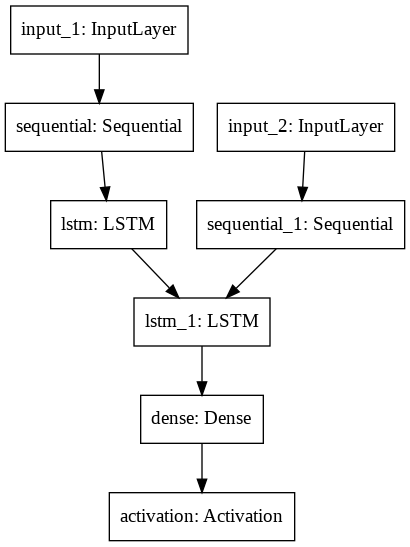

In [32]:
plot_model(model)

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit([input_questions, input_answers], decoder_final_output, epochs=5)

Epoch 1/5
1002/1002 [==============================] - 265s 264ms/step - loss: 0.8561 - accuracy: 0.8794
Epoch 2/5
1002/1002 [==============================] - 266s 266ms/step - loss: 0.2584 - accuracy: 0.9626
Epoch 3/5
1002/1002 [==============================] - 264s 264ms/step - loss: 0.1451 - accuracy: 0.9794
Epoch 4/5
1002/1002 [==============================] - 265s 264ms/step - loss: 0.0965 - accuracy: 0.9864
Epoch 5/5
1002/1002 [==============================] - 266s 265ms/step - loss: 0.0643 - accuracy: 0.9910


In [35]:
model_save_name = 'seq2seq_model.h5'
path = f"/content/gdrive/My Drive/ML Notebooks/data/cornell_dialogue_dataset/{model_save_name}" 
model.save(path)

In [36]:
model.load_weights("/content/gdrive/My Drive/ML Notebooks/data/cornell_dialogue_dataset/seq2seq_model.h5")

In [37]:
preds = model.predict([vectorize(['go way']), vectorize(['no'])])
print(preds)
preds.shape

[58, 458]
[840]
[[[9.99907255e-01 1.73261716e-09 1.04696065e-08 ... 1.61589341e-07
   2.69538836e-10 6.33419646e-08]
  [9.99919772e-01 1.63053460e-09 9.47293621e-09 ... 1.36481660e-07
   2.36962699e-10 5.95595218e-08]
  [9.99922633e-01 1.57450886e-09 9.21498522e-09 ... 1.32314995e-07
   2.28848065e-10 5.83677213e-08]
  ...
  [9.99783456e-01 7.90875543e-09 2.81344352e-08 ... 4.87069144e-07
   6.66336569e-11 2.40486116e-07]
  [9.99776423e-01 8.34395220e-09 2.90548989e-08 ... 5.04578395e-07
   6.50459478e-11 2.50079495e-07]
  [2.06357781e-05 2.76067780e-10 3.67174636e-07 ... 1.25179096e-04
   4.18990564e-10 9.74528369e-09]]]


(1, 27, 2333)

In [38]:
output = []
for i in range(maxlen):
  index = np.argmax(preds[0][i])
  if index == 0:
    output.append("PAD")
  else:
    output.append(tokenizer.index_word[index])
print(' '.join(output))

PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD


# Inference

In [39]:
enc_model = Model([enc_input_sequence], [h, c])

In [56]:
enc_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
sequential (Sequential)      (None, 27, 128)           298624    
_________________________________________________________________
lstm (LSTM)                  [(None, 27, 128), (None,  131584    
Total params: 430,208
Trainable params: 430,208
Non-trainable params: 0
_________________________________________________________________


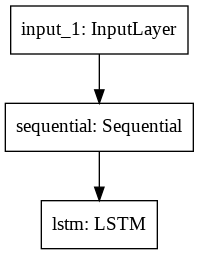

In [54]:
plot_model(enc_model)

In [40]:
decoder_state_input_h = Input(shape=(128, ))
decoder_state_input_c = Input(shape=(128, ))

decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]

In [41]:
decoder_outputs, state_h, state_c = dec_lstm(input_decoder_emb, initial_state=decoder_state_inputs)
decoder_states = [state_h, state_c]

In [43]:
dec_model = Model([dec_input_sequence] + decoder_state_inputs, [decoder_outputs] + decoder_states)

In [55]:
dec_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 27)]         0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 27, 128)      298624      input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128)]        0                                            
_______________________________________________________________________________________

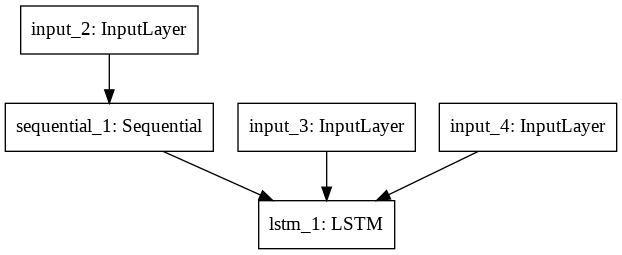

In [53]:
plot_model(dec_model)

In [44]:
print("#############################################")
print("#              Starting chatbot             #")
print("#############################################")

#############################################
#              Starting chatbot             #
#############################################


In [68]:
inp = ""

while True:
  inp = input("You : ")
  
  if inp in ['q', 'exit', 'quit']:
    break
  
  inp = clean_text(inp)

  txt = vectorize([inp])
  # print(txt)
  stat = enc_model.predict(txt)

  empty_target_seq = np.zeros((1, 1))
  empty_target_seq[0, 0] = tokenizer.word_index['SOS']
  # print(empty_target_seq.shape)
  # print(np.array(stat).shape)
  stop_condition = False
  decoded_reply = ""

  while not stop_condition:
    dec_outputs, h, c = dec_model.predict([empty_target_seq] + stat)
    decoder_concat_input = Activation('softmax')(Dense(vocab_len)(dec_outputs))

    index = np.argmax(decoder_concat_input[0, -1, :])
    word = tokenizer.index_word[index]

    if word != 'EOS':
      decoded_reply += " " + word
    if word == 'EOS' or len(decoded_reply.split()) > maxlen + 2:
      stop_condition = True

    empty_target_seq = np.zeros((1, 1))
    empty_target_seq[0, 0] = index

    stat = [h, c]
  print("Chatbot : ", decoded_reply)
  print("-------------------------------------------")

You : hii
[2330]
Chatbot :   would bit getting loser sid sleepy britain page bleeding cigarette record monster apologize gon della headache garage cash lena anthony y'know dream did michael think people bon originals
-------------------------------------------
You : great
[171]
Chatbot :   active hmmm gruber excellent taking care tracy margaret yourself cost ? maybe cross along bat norm ago 's h ms. takin pain bravo america originals wake try doctor
-------------------------------------------
You : q
